### LangGraph
**LangGraph** is built for developers who want to build powerful, adaptable AI agents.<br>
    -   **Reliability and controllability.** Steer agent actions with moderation checks and human-in-the-loop approvals. LangGraph persists context for long-running workflows, keeping your agents on course.<br>
    -   **Low-level and extensible.** Build custom agents with fully descriptive, low-level primitives free from rigid abstractions that limit customization. Design scalable multi-agent systems, with each agent serving a specific role tailored to your use case.<br>
    -   **First-class streaming support.** With token-by-token streaming and streaming of intermediate steps, LangGraph gives users clear visibility into agent reasoning and actions as they unfold in real time.

https://langchain-ai.github.io/langgraph/concepts/why-langgraph/

In [1]:
def function1(input1):
    return input1+ " from first function"

In [2]:
def function2(input2):
    return input2+ " Kumar Tiwari from second function"

In [3]:
def function3(input3):
    pass

In [4]:
function1("Satish")

'Satish from first function'

In [7]:
function2("Satish")

'Satish Kumar Tiwari from second function'

In [5]:
function2(function1("Satish"))

'Satish from first function Kumar Tiwari from second function'

In [8]:
from langgraph.graph import Graph

In [11]:
Graph()

In [25]:
workflow= Graph()

In [26]:
workflow.add_node("fun1", function1)

In [27]:
workflow.add_node("fun2", function2)

In [28]:
workflow.add_edge("fun1", "fun2")

In [29]:
workflow.set_entry_point("fun1")

In [30]:
workflow.set_finish_point("fun2")

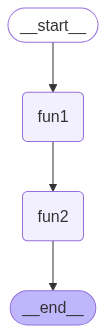

In [31]:
workflow.compile()

In [32]:
app= workflow.compile()

In [33]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

In [38]:
from IPython.display import Image, display

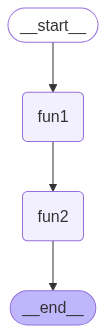

In [41]:
display(Image(app.get_graph().draw_mermaid_png()))

In [42]:
app.invoke("Hi This is Satish")

'Hi This is Satish from first function Kumar Tiwari from second function'

In [43]:
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fun1
_______
hi this is rohit from first function


here is output from fun2
_______
hi this is rohit from first function Kumar Tiwari from second function




In [46]:
from langchain_google_genai import ChatGoogleGenerativeAI

model= ChatGoogleGenerativeAI(model='gemini-1.5-flash')

In [50]:
model.invoke("Hi").content

'Hi there! How can I help you today?'

In [94]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model= ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output= model.invoke(input)
    return output.content

In [96]:
llm("Hi")

'Hi there! How can I help you today?'

In [95]:
def token_counter(input):
    token= input.split()
    token_number= len(token)
    return f"total token number in the generated answer is {token_number}"

In [97]:
token_counter(llm("Hi"))

'total token number in the generated answer is 8'

In [98]:
from langgraph.graph import Graph

In [99]:
workflow2= Graph()

In [100]:
workflow2.add_node("My_LLM", llm)

In [101]:
workflow2.add_node("LLM_Output_Token_Counter", token_counter)

In [102]:
workflow2.add_edge("My_LLM", "LLM_Output_Token_Counter")

In [103]:
workflow2.set_entry_point("My_LLM")

In [104]:
workflow2.set_finish_point("LLM_Output_Token_Counter")

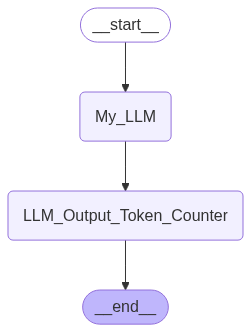

In [72]:
workflow2.compile()

In [82]:
from IPython.display import Image, display

In [107]:
app= workflow2.compile()

In [108]:
app.get_graph()

Graph(nodes={'My_LLM': Node(id='My_LLM', name='My_LLM', data=My_LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'LLM_Output_Token_Counter': Node(id='LLM_Output_Token_Counter', name='LLM_Output_Token_Counter', data=LLM_Output_Token_Counter(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='My_LLM', data=None, conditional=False), Edge(source='My_LLM', target='LLM_Output_Token_Counter', data=None, conditional=False), Edge(source='LLM_Output_Token_Counter', target='__end__', data=None, conditional=False)])

In [90]:
app.get_graph().draw_mermaid_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xfb\x00\x00\x01M\x08\x02\x00\x00\x00I\xf4\x8e-\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00 \x00IDATx\x9c\xed\xddyXTe\xdf\x07\xf0{\xf6\x19f\xd8\xb7\x19@\x04\x04QD6G\xdc0YT44\xb7\xb2(\xad4+\xb4^__\x97Js_*\x97\\zr\xa1\xb4\x9eJ{\xa4RsC\x14DM-\xd0Q\x90\xd5\x05Aeg\xd8gg\xe6\xcc\xbc\x7f\x9c\x1e$\x18\x16\x95\x99\x03\xde\xbf\xcf\xd5\xe5\xc5\x9c\xf5;\xd3\x973g\x0e\xe7\x9c\xa1\x19\x0c\x06\x04\x006\xe8T\x07\x00\xc0\xac\xa0\xf1\x00/\xd0x\x80\x17h<\xc0\x0b4\x1e\xe0\x05\x1a\x0f\xf0\xc2\xa4:@\xcfUQ\xa4V\xc8t\xcaF\x82\xd0\x194*=\xd5q:\xc7\xb1\xa03\x184\x0b+\x86\x85\x15K\xe4\xc1\xa1:N\x0fE\x83\xe3\xf1\xad\xe4_k,\xccQ\x14\xe5(\xbc\x06\xf3i4da\xc9\xb4qb7\xa9\x08\xaasu\x8e\xc3\xa3\xd7Ui\x952\x1dB\xb4\xfb\xd9r\xafA|O\x7f\xfe\xc0P+\xaas\xf5,\xd0\xf8\xc7n\xfdQ\x9f\x9eT\xdb/@\xe0\xe9\xcf\xf7\xf2\xe7S\x1d\xe7\x99\x18\x0c\xa8(GQ\x98#\xbf\x9f%\x1f\xf1\xa2C\xc0hk\xaa\x13\xf5\x14\xd0x\x84\x10\xaax\xa8>\xfbc\x85\xd7`\xc1\xa8\xc9\xf6t\x06\x8d\xea8\xdd\x89\xd0\x1a\

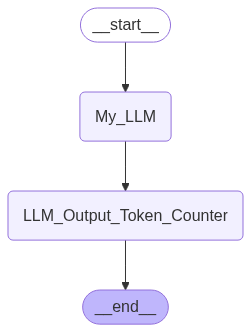

In [91]:
Image(app.get_graph().draw_mermaid_png())

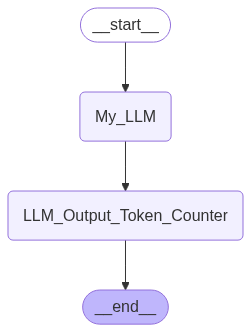

In [92]:
display(Image(app.get_graph().draw_mermaid_png()))

In [109]:
app.invoke("Hi")

'total token number in the generated answer is 8'

In [110]:
app.invoke("can you tell me about the india's capital?")

'total token number in the generated answer is 123'

In [111]:
app.invoke("tell me about the tata enterpirse in very detail.")

'total token number in the generated answer is 781'

In [112]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
Tata Enterprises is not a single entity, but rather a vast and complex conglomerate, officially known as the Tata Group.  It's a multinational conglomerate headquartered in Mumbai, India, with operations spanning numerous sectors globally.  Understanding its entirety requires breaking it down into several key aspects:

**I. History and Structure:**

* **Origins:** The group's roots trace back to 1868 with the establishment of a trading company by Jamsetji Tata.  His vision extended beyond mere profit, encompassing social responsibility and nation-building, a philosophy that continues to shape the group today.
* **Structure:** The Tata Group isn't a single company but a network of independent operating companies, trusts, and philanthropic organizations.  These entities are linked through shared ownership, a common brand identity, and the overarching Tata Sons, the group's holding company.  This decentralized structure allows for greater autonomy and sp